# Explore here

In [47]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

True

In [48]:
# Get credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Authenticate with Spotify
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

# Spotify URI
bad_bunny = 'spotify:artist:4q3ewBCX7sLwd24euuV69X'

# Fetch albums
results = spotify.artist_albums(bad_bunny, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

In [49]:
# Get top tracks
top_tracks_results = spotify.artist_top_tracks(bad_bunny)

top_tracks_data = [{
    'name': track['name'],
    'popularity': track['popularity'],
    'album': track['album']['name'],
    'release_date': track['album']['release_date'],
} for track in top_tracks_results['tracks']]

df_top_tracks = pd.DataFrame(top_tracks_data)
df_top_tracks.sort_values('popularity', ascending=False, inplace=True)

# Show top 5 most played songs
print("\nTop 5 Bad Bunny's Most Popular Songs:")
print(df_top_tracks.head(5))


Top 5 Bad Bunny's Most Popular Songs:
                   name  popularity                 album release_date
0                  DtMF          98  DeBÍ TiRAR MáS FOToS   2025-01-05
1     BAILE INoLVIDABLE          97  DeBÍ TiRAR MáS FOToS   2025-01-05
2              NUEVAYoL          94  DeBÍ TiRAR MáS FOToS   2025-01-05
3                   EoO          94  DeBÍ TiRAR MáS FOToS   2025-01-05
4  VOY A LLeVARTE PA PR          94  DeBÍ TiRAR MáS FOToS   2025-01-05


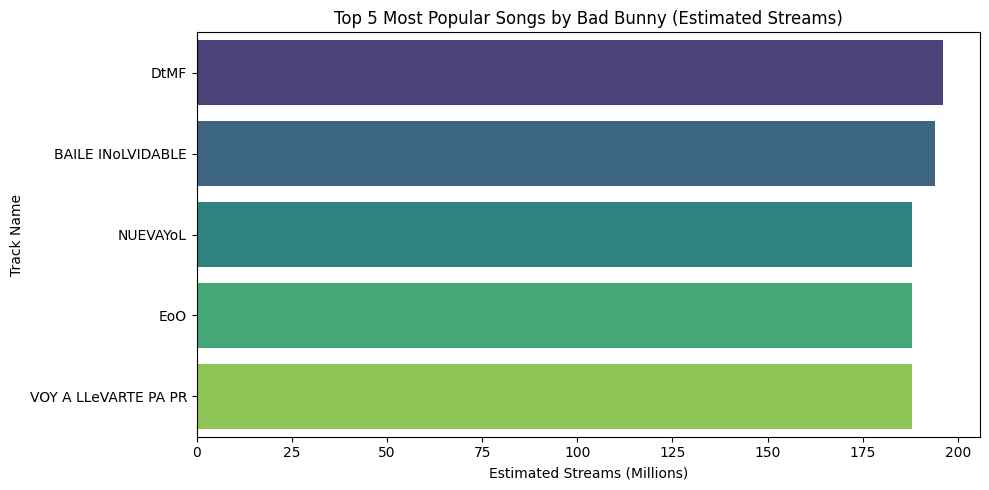

In [50]:
df_top_tracks['estimated_streams_millions'] = df_top_tracks['popularity'] * 2  

plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_top_tracks.head(5),
    x='estimated_streams_millions',
    y='name',
    hue='name',
    palette='viridis',
    dodge=False,  
    legend=False  
)
plt.title("Top 5 Most Popular Songs by Bad Bunny (Estimated Streams)")
plt.xlabel("Estimated Streams (Millions)")
plt.ylabel("Track Name")
plt.tight_layout()
plt.show()


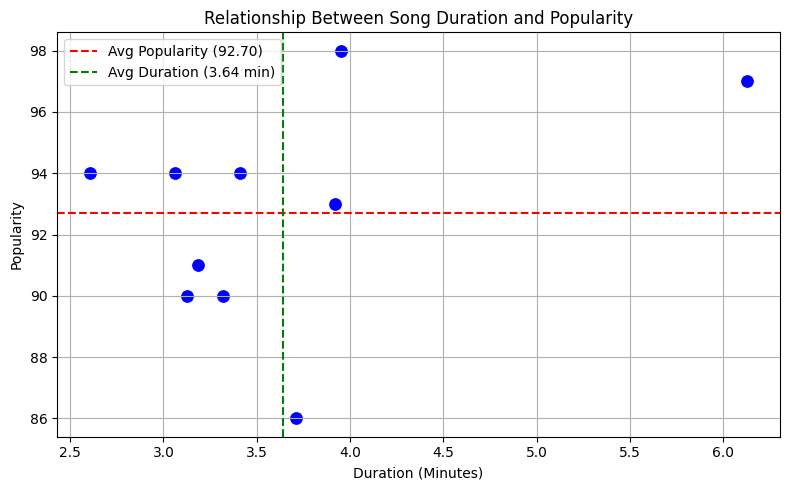

Correlation between duration and popularity: 0.4073381036285751


In [53]:
# Fetch track details (including duration)
top_tracks_data = [{
    'name': track['name'],
    'popularity': track['popularity'],
    'album': track['album']['name'],
    'release_date': track['album']['release_date'],
    'duration_ms': track['duration_ms']  # Duration in milliseconds
} for track in top_tracks_results['tracks']]

# Convert the data into a DataFrame
df_top_tracks = pd.DataFrame(top_tracks_data)

# Convert duration from milliseconds to minutes
df_top_tracks['duration_min'] = df_top_tracks['duration_ms'] / 60000

# Calculate the averages
avg_duration = df_top_tracks['duration_min'].mean()
avg_popularity = df_top_tracks['popularity'].mean()

# Scatter plot: Duration vs. Popularity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_top_tracks, x='duration_min', y='popularity', color='blue', s=100)

# Add horizontal and vertical lines at the averages
plt.axhline(y=avg_popularity, color='red', linestyle='--', label=f'Avg Popularity ({avg_popularity:.2f})')
plt.axvline(x=avg_duration, color='green', linestyle='--', label=f'Avg Duration ({avg_duration:.2f} min)')

# Add title and labels
plt.title("Relationship Between Song Duration and Popularity")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Popularity")

# Show gridlines for better visualization
plt.grid(True)

# Add a legend to label the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print correlation for analysis
correlation = df_top_tracks['duration_min'].corr(df_top_tracks['popularity'])
print(f"Correlation between duration and popularity: {correlation}")
